In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\Lenovo\natural_disasters_2024.csv")
df.head()

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,1,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,2,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,3,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,4,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,5,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Disaster_ID       10000 non-null  int64  
 1   Disaster_Type     10000 non-null  object 
 2   Location          10000 non-null  object 
 3   Magnitude         10000 non-null  float64
 4   Date              10000 non-null  object 
 5   Fatalities        10000 non-null  int64  
 6   Economic_Loss($)  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


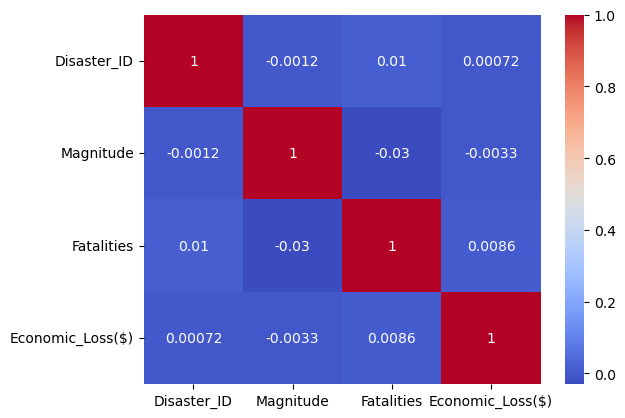

In [7]:
df.info()
df.describe()
df.isnull().sum()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [8]:
# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)


# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Scale data (optional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression

# Drop non-numeric / ID columns you don’t want as features
X = df.drop([
    "Disaster_ID", "Fatalities"  # drop ID + target
], axis=1, errors="ignore")

# Target column
y = df["Fatalities"]

# Feature selection
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

print("Selected feature indices:", selector.get_support(indices=True))

Selected feature indices: [   0 2196 2309 3194 4972 5861 5914 6700 6746 7355]
